<h1 align=center><font size = 10> Classification with Python</font></h1>

In this notebook, we try to practice all the classification algorithms that we have learned in this course.

We load a dataset using the Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:

In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline
%matplotlib inline

# Mandatory part (85%  of the total score)

## About dataset

The Pima is a group of Native Americans living in Arizona. A genetic predisposition allowed this group to survive normally to a diet poor of carbohydrates for years. In recent years, a sudden shift from traditional agricultural crops to processed foods, together with a decline in physical activity, has made them develop the highest prevalence of type 2 diabetes and for this reason, they have been subject of many studies.

The dataset includes data from 768 women with 8 characteristics, in particular:

- Number of times pregnant
- Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- Diastolic blood pressure (mm Hg)
- Triceps skinfold thickness (mm)
- 2-Hour serum insulin (mu U/ml)
- Body mass index (weight in kg/(height in m)^2)
- Diabetes pedigree function
- Age (years)
- The last column of the dataset indicates if the person has been diagnosed with diabetes (1) or not (0)

## The problem:

The type of dataset and problem is a classic supervised binary classification. Given a number of elements with certain characteristics (features), we want to build a machine learning model to identify people affected by type 2 diabetes.

To solve the problem we will have to analyze the data, do any required transformation and nomarlization, apply a machine learning algorithm, train a model, check the performance of the trained model and iterate with other algorithms until we find the most performant for our type of dataset.

## Load Data From CSV File  

### 1. Load the dataset from the 'pima-indians-diabetes.csv' file.

Because the CSV doesn't contain any header, we add column names using the description from the original dataset website:

dataset.columns = ["NumTimesPrg", "PlGlcConc", "BloodP", "SkinThick", "TwoHourSerIns", "BMI", "DiPedFunc", "Age", "HasDiabetes"]

In [2]:
!wget  --quiet  --no-check-certificate https://raw.githubusercontent.com/VuongDS/303/main/pima-indians-diabetes.csv

In [3]:
df_first = pd.read_csv('pima-indians-diabetes.csv')
df_first.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [4]:
#TO DO:
df = pd.read_csv("pima-indians-diabetes.csv", names=["NumTimesPrg", "PlGlcConc", "BloodP", "SkinThick", "TwoHourSerIns", "BMI", "DiPedFunc", "Age", "HasDiabetes"])
df.head()

,NumTimesPrg,PlGlcConc,BloodP,SkinThick,TwoHourSerIns,BMI,DiPedFunc,Age,HasDiabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Inspect the Dataset

### 2. Print out the shape of the dataset: we have 768 rows and 9 columns. Then, print out the head of the dataset to better understand the data format.

The first 8 columns are features while the last one is the supervised label (1 = has diabetes, 0 = no diabetes)

In [5]:
#TO DO:
# Number of times pregnant
# Plasma glucose concentration a 2 hours in an oral glucose tolerance test
# Diastolic blood pressure (mm Hg)
# Triceps skinfold thickness (mm)
# 2-Hour serum insulin (mu U/ml)
# Body mass index (weight in kg/(height in m)^2)
# Diabetes pedigree function
# Age (years)
df.shape

(768, 9)

# Data visualization and pre-processing



## Data correlation matrix
### 3. Let's calculate the correlation matrix for our dataset.

The correlation matrix is an important tool to understand the correlation between the different characteristics. The values range from -1 to 1 and the closer a value is to 1 the better correlation there is between two characteristics. 

In [6]:
#TO DO:
df.corr()

,NumTimesPrg,PlGlcConc,BloodP,SkinThick,TwoHourSerIns,BMI,DiPedFunc,Age,HasDiabetes
NumTimesPrg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
PlGlcConc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodP,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThick,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
TwoHourSerIns,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiPedFunc,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
HasDiabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


### 4. Render the corr matrix using the heatmap in seaborn.

In [7]:
!pip install seaborn

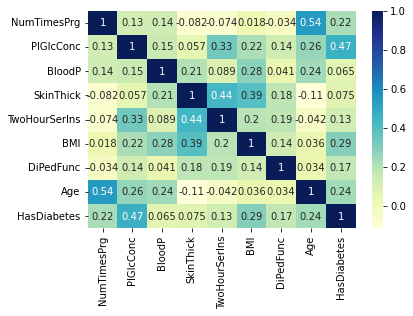

In [8]:
#TO DO:
%matplotlib inline
import matplotlib.pyplot as mp
import seaborn as sb
dataplot = sb.heatmap(df.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
mp.show()

### 5. Print out the column which has the biggest corr number with 'HasDiabetes'.

In [9]:
print(df['HasDiabetes'].corr(df['PlGlcConc']))

0.4665813983068733


## Visualize the Dataset
Visualizing the data is an important step of the data analysis. With a graphical visualization of the data, we have a better understanding of the various features values distribution: for example, we can understand the average age of the people or the average BMI, etc...

We could, of course, limit our inspection to the table visualization, but we could miss important things that may affect our model precision.
### 6. Manipulate histogram to represent all data columns in the dataset.

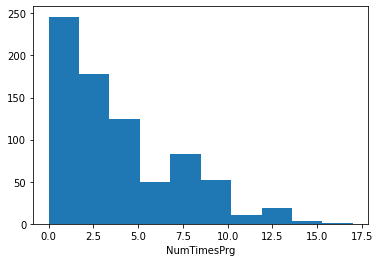

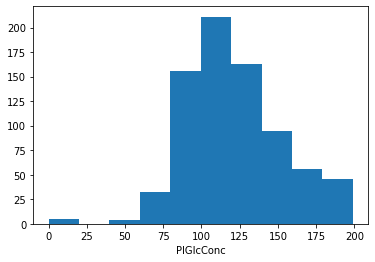

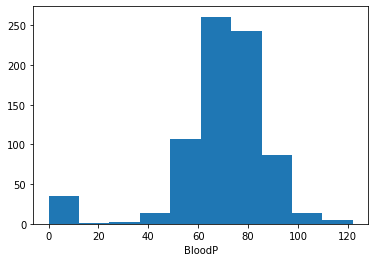

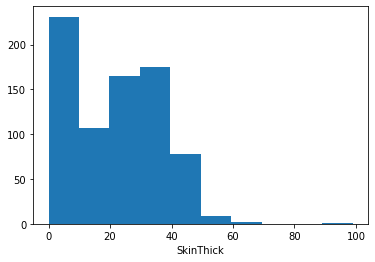

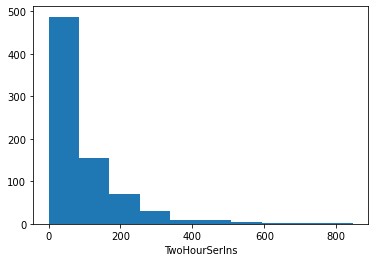

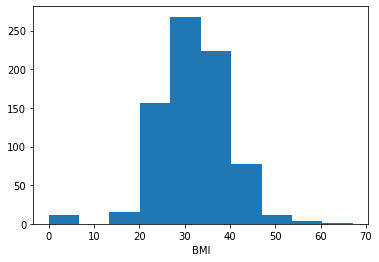

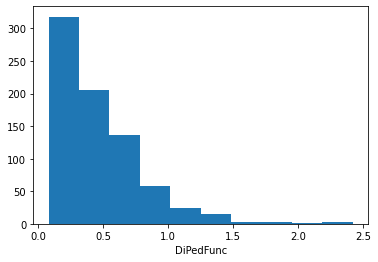

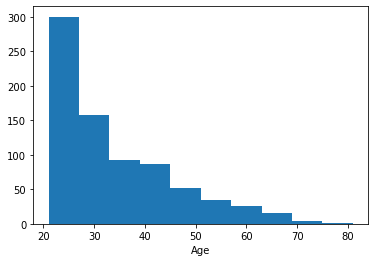

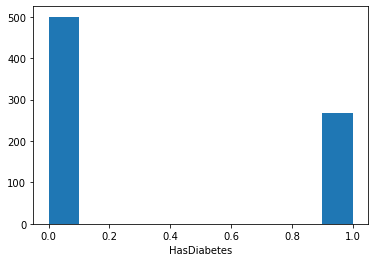

In [10]:
#TO DO:
for col in df.columns:
    plt.hist(df[col])
    plt.xlabel(col)
    plt.show()

An important thing I notice in the dataset (and that wasn't obvious at the beginning) is the fact that some people have null (zero) values for some of the features: it's not quite possible to have 0 for BMI or the blood pressure.

How can we deal with similar values? We will see it later during the data transformation phase.

## Data cleaning and transformation

We have noticed from the previous analysis that some patients have missing data for some of the features. Machine learning algorithms don't work very well when the data are missing so we have to find a solution to "clean" the data we have.

The easiest option could be to eliminate all those patients with null/zero values, but in this way, we would eliminate a lot of important data.

Another option is to calculate the median value for a specific column and substitute that value everywhere (in the same column) we have zero or null. Let's see how to apply this second method.

### 7. Interpolate missing values on ['BMI', 'BloodP', 'PlGlcConc', 'SkinThick',  'TwoHourSerIns'] using median values or any other way which is effective.

We haven't transformed all the columns, because of some values which can make sense to be zero (like "Number of times pregnant").

In [11]:
#TO DO:
df['BMI'] = df['BMI'].fillna(df['BMI'].mean())
df['BloodP'] = df['BloodP'].fillna(df['BloodP'].mean())
df['PlGlcConc'] = df['PlGlcConc'].fillna(df['PlGlcConc'].mean())
df['SkinThick'] = df['SkinThick'].fillna(df['SkinThick'].mean())
df['TwoHourSerIns'] = df['TwoHourSerIns'].fillna(df['TwoHourSerIns'].mean())

## Normalize Data 

One of the most important data transformations we need to apply is the features scaling. Basically, most of the machine learning algorithms don't work very well if the features have a different set of values. In our case, for example, the Age ranges from 20 to 80 years old, while the number of times a patient has been pregnant ranges from 0 to 17. For this reason, we need to apply a proper transformation.

### 8. Execute Data Standardization using data zero mean and unit variance (don't forget to remove ground truth column before scaling).

In [12]:
X = df[["NumTimesPrg", "PlGlcConc", "BloodP", "SkinThick", "TwoHourSerIns", "BMI", "DiPedFunc", "Age"]]

In [13]:
#TO DO:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

In [14]:
X

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

# Splitting the Dataset

Now that we have transformed the data, we need to split the dataset into two parts: a training dataset and a test dataset. Splitting the dataset is a very important step for supervised machine learning models. Basically, we are going to use the first part to train the model (ignoring the column with the pre-assigned label), then we use the trained model to make predictions on new data (which is the test dataset, not part of the training set) and compare the predicted value with the pre-assigned label.

### 9. Split the dataset into 80/20 using the stratified technique and random_state=7.

In [15]:
y = df['HasDiabetes']

In [16]:
#TO DO:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=7)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (614, 8) (614,)
Test set: (154, 8) (154,)


# Additional Question: 
### Why should we perform data normalization and data splitting before the training step?
Type your answer in the cell bellow as the markdown format.

### TO DO:
**We need data normalization because:**
- Almost data nomilazed working more axactly with machine learning algorithms
- Some data are redundant need to be remove
- Some missing value need to be filled

**Besides that, the reasons for data splitting:**
- If we train and test in the same dataset, It may be lead to low out of sample accuracy ( overfit )
- Splitting can resolve overfit issue when training model

### 10. Print out the proportion of positive/total women who have diabetes on the full dataset, training dataset, and testing dataset.

In [17]:
percent_full = df['HasDiabetes'].value_counts(normalize=True)
print(percent_full)
for i,j in zip(percent_full,percent_full.index):
  if j == 1:
    print('Percentage of full dataset positive women is: {}%'.format(round(i*100,2)))

0    0.651042
1    0.348958
Name: HasDiabetes, dtype: float64
Percentage of full dataset positive women is: 34.9%


In [18]:
percent_train = y_train.value_counts(normalize=True)
print(percent_train)
for i,j in zip(percent_train,percent_train.index):
  if j == 1:
    print('Percentage of train_dataset positive women is: {}%'.format(round(i*100,2)))

0    0.656352
1    0.343648
Name: HasDiabetes, dtype: float64
Percentage of train_dataset positive women is: 34.36%


In [19]:
percent_test = y_test.value_counts(normalize=True)
print(percent_test)
for i,j in zip(percent_test,percent_test.index):
  if j == 1:
    print('Percentage of test_dataset positive women is: {}%'.format(round(i*100,2)))

0    0.62987
1    0.37013
Name: HasDiabetes, dtype: float64
Percentage of test_dataset positive women is: 37.01%


# Classification 

Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model.

You should use the following algorithms:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression
- Soft voting
- Hard voting



**__ Notes:__**

- You must try to **FINE TUNE AT LEAST 3 PARAMETERS** on each algorithm, except on soft voting and hard voting.
- You can go above and change the pre-processing, feature selection, feature extraction, and so on, to make a better model.
- You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
- You should include the code of the algorithm in the following cells.

# Import Evaluation Metrices

In [20]:
from sklearn.metrics import jaccard_score, f1_score, accuracy_score

In [21]:
# a dictionary for keeping all scores of the classifiers
f1_scores = {'train':{'KNN': 0, 'DT': 0, 'SVM': 0, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0},
             'test':{'KNN': 0, 'DT': 0, 'SVM': 0, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}}
jaccard_scores = {'train':{'KNN': 0, 'DT': 0, 'SVM': 0, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}, 
                  'test':{'KNN': 0, 'DT': 0, 'SVM': 0, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}}


# K Nearest Neighbor(KNN)
### 11. Finetune at least 3 parameters to get the KNN model with best accuracy. Then, print out the KNN model's parameters with the best accuracy(best estimator).
Hint: Using GridSearchCV in sklearn.model_selection.

**Warning:** You should not use the test data for finding the best parameters.

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [23]:
#TO DO:
#Train Model and Predict

#Define model
knn = KNeighborsClassifier()

#Parameter setting for GridSearchCV
params = [{'n_neighbors': [9, 10, 15, 20, 25, 30],
           'leaf_size' : [2, 4, 6],
         'weights': ['uniform', 'distance']}]
gs_knn = GridSearchCV (knn, param_grid = params, cv=3)
gs_knn.fit(X_train, y_train)
gs_knn.best_params_

{'leaf_size': 2, 'n_neighbors': 20, 'weights': 'distance'}

In [24]:
#Get best para for voting
best_knn = KNeighborsClassifier( leaf_size = 2, n_neighbors = 20, weights = 'distance')

In [25]:
#Loop for select best cv parameter for GridSearchCV. After run, I choose cv = 3
"""
for i in range(2, 40):
  gs_knn = GridSearchCV (knn, param_grid = param_lr, cv = i)
  gs_knn.fit(X_train, y_train)
  yhat = gs_knn.predict(X_test)
  print("Train / Test set Accuracy: ",metrics.accuracy_score(y_train, gs_knn.predict(X_train)), 'cv = ',i ,'|',metrics.accuracy_score(y_test, yhat),gs_knn.best_params_)
"""

'\nfor i in range(2, 40):\n  gs_knn = GridSearchCV (knn, param_grid = param_lr, cv = i)\n  gs_knn.fit(X_train, y_train)\n  yhat = gs_knn.predict(X_test)\n  print("Train / Test set Accuracy: ",metrics.accuracy_score(y_train, gs_knn.predict(X_train)), \'cv = \',i ,\'|\',metrics.accuracy_score(y_test, yhat),gs_knn.best_params_)\n'

# Additional Question: 
### Interpret and explain the parameters you have chosen to fine tune in KNN algorithm.
Type your answer in the cell bellow as markdown format.

### TO DO:
**The parameters have been chosen to fine tune in KNN algorithm:**
- 'n_neighbors', this parameter means the number of neighbors has the distance nearest to the point under considering
- 'leaf_size', this parameter means the size of the leaf of the algorithms. This can affect the speed of the construction and query
- 'weights', this parameter means choosing a function to consider the weighted of nearest points. Uniform weights mean all points in each neighborhood are weighted equally. Distance weight means points by the inverse of their distance.

**Beside that, in 'GridSearchCV', the cv paramater mean 'k-fold cross validation':**
- The algorithm divide dataset k part then execute train for each part
- The final result is the average of all parts result

### 12. Run the prediction on KNN models on training data and test data, then calculate the f1 score and Jaccard similarity score and save it to f1_scores dict and jaccard_scores dict.  
**Requirement**: F1 score on test data must be higher than **0.6**, Jaccard similarity score must be higher than **0.75**.

In [26]:
y_pred = gs_knn.predict(X_train)
print(y_train.shape, y_pred.shape)

(614,) (614,)


In [52]:
y_train.dtype

dtype('int64')

In [27]:
#Predict test dataset
yhat = gs_knn.predict(X_test)

#Use accuracy_score instead of Jaccard because of new version scikit learn
print("Train set Accuracy: ", accuracy_score(y_train, gs_knn.predict(X_train)))
print("Test set Accuracy: ", accuracy_score(y_test, yhat))

#Calculate f1 score
print("Train set f1_scores: ", f1_score(y_train, gs_knn.predict(X_train)))
print("Test set f1_scores: ", f1_score(y_test, yhat))

Train set Accuracy:  1.0
Test set Accuracy:  0.7987012987012987
Train set f1_scores:  1.0
Test set f1_scores:  0.6804123711340206


In [28]:
f1_scores['test']['KNN'] = f1_score(y_test, yhat)
f1_scores['train']['KNN'] = f1_score(y_train, gs_knn.predict(X_train))
jaccard_scores['test']['KNN'] = accuracy_score(y_test, yhat)
jaccard_scores['train']['KNN'] = accuracy_score(y_train, gs_knn.predict(X_train))
print(f1_scores)
print(jaccard_scores)

{'train': {'KNN': 1.0, 'DT': 0, 'SVM': 0, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}, 'test': {'KNN': 0.6804123711340206, 'DT': 0, 'SVM': 0, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}}
{'train': {'KNN': 1.0, 'DT': 0, 'SVM': 0, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}, 'test': {'KNN': 0.7987012987012987, 'DT': 0, 'SVM': 0, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}}


# Decision Tree

### 13, 14. Perform task 11 and 12 on the DT model.

Hint: Using GridSearchCV in sklearn.model_selection.

**Warning**: You should not use the test data for finding the best parameters.

**Requirement**: F1 score on test data has to higher than **0.6**, the Jaccard similarity score must be higher than **0.73**.

In [29]:
from sklearn import tree

In [30]:
#TO DO:

#Define model
dt = tree.DecisionTreeClassifier()

#Parameter setting for Decision Tree
params_dt = [{'min_samples_split':[2, 3, 4, 5], 
         'min_samples_leaf':[1, 2, 3, 4, 5],
         'max_depth': [1, 2, 3, 4, 6, 8, 10, 12]}]

gs_dt = GridSearchCV (dt, param_grid = params_dt, cv = 8) # cv was runned loop for finding the best parameter
gs_dt.fit(X_train, y_train)
gs_dt.best_params_

{'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [31]:
#Get best para for voting
best_dt = tree.DecisionTreeClassifier(max_depth = 3, min_samples_leaf = 1, min_samples_split = 2)

In [32]:
#Predict test dataset
yhat_dt = gs_dt.predict(X_test)

#Use accuracy_score instead of Jaccard because of new version scikit learn
print("Train set Accuracy: ", accuracy_score(y_train, gs_dt.predict(X_train)))
print("Test set Accuracy: ", accuracy_score(y_test, yhat_dt))

#Calculate f1 score
print("Train set f1_scores: ", f1_score(y_train, gs_dt.predict(X_train)))
print("Test set f1_scores: ", f1_score(y_test, yhat_dt))

Train set Accuracy:  0.7752442996742671
Test set Accuracy:  0.7857142857142857
Train set f1_scores:  0.6443298969072165
Test set f1_scores:  0.679611650485437


In [33]:
f1_scores['test']['DT'] = f1_score(y_test, yhat_dt)
f1_scores['train']['DT'] = f1_score(y_train, gs_dt.predict(X_train))
jaccard_scores['test']['DT'] = accuracy_score(y_test, yhat_dt)
jaccard_scores['train']['DT'] = accuracy_score(y_train, gs_dt.predict(X_train))
print(f1_scores)
print(jaccard_scores)

{'train': {'KNN': 1.0, 'DT': 0.6443298969072165, 'SVM': 0, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}, 'test': {'KNN': 0.6804123711340206, 'DT': 0.679611650485437, 'SVM': 0, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}}
{'train': {'KNN': 1.0, 'DT': 0.7752442996742671, 'SVM': 0, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}, 'test': {'KNN': 0.7987012987012987, 'DT': 0.7857142857142857, 'SVM': 0, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}}


# Additional Question: 
### Interpret and explain the parameters you have chosen to fine tune in DT algorithm.
Type your answer in the cell bellow as the markdown format.

### TO DO:


**The parameters have been chosen to fine tune in Decision Tree algorithm:**
- **'min_samples_split'**: The minimum number of samples required to split an internal node
- **'min_samples_leaf'**: The minimum number of samples is required to be at a leaf node.
- **'max_depth'**: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure.

# Support Vector Machine

### 15, 16. Perform task 11 and 12 on SVM models.

Hint: Using GridSearchCV in sklearn.model_selection.

**Warning**: You should not use the test data for finding the best parameters.

**Requirement**: F1 score on test data has to higher than **0.62**, Jaccard similarity score must be higher than **0.75**.

In [34]:
from sklearn.svm import SVC

In [35]:
#TO DO:

#Define model
svc = SVC()

#Parameter setting for Support Vector Machine
param_svc = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [100, 10, 1, 0.1, 0.01, 0.0001], 
              'random_state' : [1, 5],
             'probability' : [True]}
gs_svc = GridSearchCV (svc, param_grid = param_svc, cv = 8) # cv was runned loop for finding the best parameter
gs_svc.fit(X_train, y_train)
gs_svc.best_params_

{'C': 10, 'gamma': 0.01, 'probability': True, 'random_state': 1}

In [36]:
#Get best para for voting
best_SVC = SVC(C= 10, gamma= 0.01, probability= True, random_state= 1)

In [37]:
#Predict test dataset
yhat_svc = gs_svc.predict(X_test)

#Use accuracy_score instead of Jaccard because of new version scikit learn
print("Train set Accuracy: ", accuracy_score(y_train, gs_svc.predict(X_train)))
print("Test set Accuracy: ", accuracy_score(y_test, yhat_svc))

#Calculate f1 score
print("Train set f1_scores: ", f1_score(y_train, gs_svc.predict(X_train)))
print("Test set f1_scores: ", f1_score(y_test, yhat_svc))

Train set Accuracy:  0.7882736156351792
Test set Accuracy:  0.8181818181818182
Train set f1_scores:  0.6467391304347827
Test set f1_scores:  0.7142857142857142


In [38]:
f1_scores['test']['SVM'] = f1_score(y_test, yhat_svc)
f1_scores['train']['SVM'] = f1_score(y_train, gs_svc.predict(X_train))
jaccard_scores['test']['SVM'] = accuracy_score(y_test, yhat_svc)
jaccard_scores['train']['SVM'] = accuracy_score(y_train, gs_svc.predict(X_train))
print(f1_scores)
print(jaccard_scores)

{'train': {'KNN': 1.0, 'DT': 0.6443298969072165, 'SVM': 0.6467391304347827, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}, 'test': {'KNN': 0.6804123711340206, 'DT': 0.679611650485437, 'SVM': 0.7142857142857142, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}}
{'train': {'KNN': 1.0, 'DT': 0.7752442996742671, 'SVM': 0.7882736156351792, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}, 'test': {'KNN': 0.7987012987012987, 'DT': 0.7857142857142857, 'SVM': 0.8181818181818182, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}}


# Additional Question: 
### Interpret and explain the parameters you have chosen to fine tune in SVM algorithm.
Type your answer in the cell bellow as the markdown format.

### TO DO:


**The parameters have been chosen to fine tune in Support Vector Machine algorithm:**
- **'C'** : For low C, the model has a larger-margin separating hyperplane, It misclassifies more points. For large C,  the model has a smaller-margin hyperplane, It does a better job of getting all the training points classified correctly.
-**'gamma'**:Gamma decides how much curvature we want in a decision boundary. Gamma high means more curvature. Gamma low means less curvature.
- **'random_state'** : get different results every time running the program
- **'probability'**: This must be enabled prior to calling fit

# Logistic Regression

### 17, 18. Perform task 11 and 12 on Logistic Regression model.

Hint: Using GridSearchCV in sklearn.model_selection.

**Warning**: You should not use the test data for finding the best parameters.

**Requirement**: F1 score on test data has to higher than **0.63**, Jaccard similarity score must be higher than **0.75**.

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
#TO DO:

#Define model
LR = LogisticRegression()

#Parameter setting for Logistic Regression
param_lr = {'C': [0.1, 1, 10, 100, 1000],  
              'solver' : ['newton-cg', 'lbfgs', 'sag', 'saga'],
            'multi_class' : ['auto', 'ovr', 'multinomial']
             }
gs_lr = GridSearchCV (LR, param_grid = param_lr, cv = 7) # cv was runned loop for finding the best parameter
gs_lr.fit(X_train, y_train)
print(gs_lr.best_params_)

{'C': 1, 'multi_class': 'multinomial', 'solver': 'newton-cg'}


In [41]:
#Get best para for voting
best_LR = LogisticRegression(C = 1, multi_class = 'multinomial', solver = 'newton-cg')

In [42]:
#Predict test dataset
yhat_lr = gs_lr.predict(X_test)

#Use accuracy_score instead of Jaccard because of new version scikit learn
print("Train set Accuracy: ", accuracy_score(y_train, gs_lr.predict(X_train)))
print("Test set Accuracy: ", accuracy_score(y_test, yhat_lr))

#Calculate f1 score
print("Train set f1_scores: ", f1_score(y_train, gs_lr.predict(X_train)))
print("Test set f1_scores: ", f1_score(y_test, yhat_lr))

Train set Accuracy:  0.7768729641693811
Test set Accuracy:  0.7857142857142857
Train set f1_scores:  0.6346666666666667
Test set f1_scores:  0.6597938144329897


In [43]:
f1_scores['test']['LR'] = f1_score(y_test, yhat_lr)
f1_scores['train']['LR'] = f1_score(y_train, gs_lr.predict(X_train))
jaccard_scores['test']['LR'] = accuracy_score(y_test, yhat_lr)
jaccard_scores['train']['LR'] = accuracy_score(y_train, gs_lr.predict(X_train))
print(f1_scores)
print(jaccard_scores)

{'train': {'KNN': 1.0, 'DT': 0.6443298969072165, 'SVM': 0.6467391304347827, 'LR': 0.6346666666666667, 'EN_HARD': 0, 'EN_SOFT': 0}, 'test': {'KNN': 0.6804123711340206, 'DT': 0.679611650485437, 'SVM': 0.7142857142857142, 'LR': 0.6597938144329897, 'EN_HARD': 0, 'EN_SOFT': 0}}
{'train': {'KNN': 1.0, 'DT': 0.7752442996742671, 'SVM': 0.7882736156351792, 'LR': 0.7768729641693811, 'EN_HARD': 0, 'EN_SOFT': 0}, 'test': {'KNN': 0.7987012987012987, 'DT': 0.7857142857142857, 'SVM': 0.8181818181818182, 'LR': 0.7857142857142857, 'EN_HARD': 0, 'EN_SOFT': 0}}


# Additional Question: 
### Interpret and explain the parameters you have chosen to fine tune in LR algorithm.
Type your answer in the cell bellow as the markdown format.

### TO DO:


**The parameters have been chosen to fine tune in Logistic Regression algorithm:**
- **'C'**: A high value of C tells the model to give high weight to the training data, and a lower weight to the complexity penalty. A low value tells the model to give more weight to this complexity penalty at the expense of fitting to the training data.
- **'solver'** : For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones;
- **'multi_class'** : If the option chosen is ‘ovr’, then a binary problem is fit for each label. For ‘multinomial’ the loss minimised is the multinomial loss fit across the entire probability distribution, even when the data is binary. 

# Advanced part (15%  of the total score)

# Ensemble model

### 19. Perform soft voting on the 4 above models (using the same setting for the 4 models as in previous steps.) 
**Hint**: Using VotingClassifier in sklearn.ensemble.

In [44]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

In [45]:
#TO DO:

#Soft Voting: In soft voting, the output class is the prediction based on the average of probability given to that class.

#Create a list to store parameters
estimator_soft = []

estimator_soft.append(('LR', best_LR))
estimator_soft.append(('SVC', best_SVC))
estimator_soft.append(('DTC', best_dt))
estimator_soft.append(('KNN', best_knn))



#Voting Classifier with soft voting
eclf_soft = VotingClassifier(estimators=estimator_soft, voting='soft').fit(X_train, y_train)
#eclf_soft

### 20. Run the prediction on the ensembling model using soft voting on training data and test data, then calculate the f1 score and Jaccard similarity score and save it to f1_scores dict and jaccard_scores dict.¶

**Requirement**: F1 score on test data must be higher than **0.66**, Jaccard similarity score must be higher than **0.78**.

In [46]:
#TO DO:

#Predict test dataset
yhat_soft = eclf_soft.predict(X_test)

#Use accuracy_score instead of Jaccard because of new version scikit learn
print("Train set Accuracy: ", accuracy_score(y_train, eclf_soft.predict(X_train)))
print("Test set Accuracy: ", accuracy_score(y_test, yhat_soft))

#Calculate f1 score
print("Train set f1_scores: ", f1_score(y_train, eclf_soft.predict(X_train)))
print("Test set f1_scores: ", f1_score(y_test, yhat_soft))

Train set Accuracy:  0.9006514657980456
Test set Accuracy:  0.7987012987012987
Train set f1_scores:  0.8439897698209718
Test set f1_scores:  0.6868686868686869


In [47]:
f1_scores['test']['EN_SOFT'] = f1_score(y_test, yhat_soft)
f1_scores['train']['EN_SOFT'] = f1_score(y_train, eclf_soft.predict(X_train))
jaccard_scores['test']['EN_SOFT'] = accuracy_score(y_test, yhat_soft)
jaccard_scores['train']['EN_SOFT'] = accuracy_score(y_train, eclf_soft.predict(X_train))
print(f1_scores)
print(jaccard_scores)

{'train': {'KNN': 1.0, 'DT': 0.6443298969072165, 'SVM': 0.6467391304347827, 'LR': 0.6346666666666667, 'EN_HARD': 0, 'EN_SOFT': 0.8439897698209718}, 'test': {'KNN': 0.6804123711340206, 'DT': 0.679611650485437, 'SVM': 0.7142857142857142, 'LR': 0.6597938144329897, 'EN_HARD': 0, 'EN_SOFT': 0.6868686868686869}}
{'train': {'KNN': 1.0, 'DT': 0.7752442996742671, 'SVM': 0.7882736156351792, 'LR': 0.7768729641693811, 'EN_HARD': 0, 'EN_SOFT': 0.9006514657980456}, 'test': {'KNN': 0.7987012987012987, 'DT': 0.7857142857142857, 'SVM': 0.8181818181818182, 'LR': 0.7857142857142857, 'EN_HARD': 0, 'EN_SOFT': 0.7987012987012987}}


### 21, 22. Perform task 19 and 20 using hard voting.
Hint: Using GridSearchCV in sklearn.model_selection.

**Warning**: You should not use the test data for finding the best parameters.

**Requirement**: F1 score on test data must be higher than **0.57**, Jaccard similarity score must be higher than **0.73**.

In [48]:
#TO DO:

#Hard Voting: In hard voting, the predicted output class is a class with the highest majority of votes i.e the class which had the highest probability of being predicted by each of the classifiers.

estimator_hard = []
estimator_hard.append(('LR', best_LR))
estimator_hard.append(('DTC', best_dt))
estimator_hard.append(('KNN', best_knn))

#Voting Classifier with hard voting
eclf_hard = VotingClassifier(estimators=estimator_hard, voting='hard').fit(X_train, y_train)
eclf_hard

VotingClassifier(estimators=[('LR',
                              LogisticRegression(C=1, multi_class='multinomial',
                                                 solver='newton-cg')),
                             ('DTC', DecisionTreeClassifier(max_depth=3)),
                             ('KNN',
                              KNeighborsClassifier(leaf_size=2, n_neighbors=20,
                                                   weights='distance'))])

In [49]:
#TO DO:

#Predict test dataset
yhat_hard = eclf_hard.predict(X_test)

#Use accuracy_score instead of Jaccard because of new version scikit learn
print("Train set Accuracy: ", accuracy_score(y_train, eclf_hard.predict(X_train)))
print("Test set Accuracy: ", accuracy_score(y_test, yhat_hard))

#Calculate f1 score
print("Train set f1_scores: ", f1_score(y_train, eclf_hard.predict(X_train)))
print("Test set f1_scores: ", f1_score(y_test, yhat_hard))

Train set Accuracy:  0.8289902280130294
Test set Accuracy:  0.7987012987012987
Train set f1_scores:  0.72
Test set f1_scores:  0.6804123711340206


In [50]:
f1_scores['test']['EN_HARD'] = f1_score(y_test, yhat_hard)
f1_scores['train']['EN_HARD'] = f1_score(y_train, eclf_hard.predict(X_train))
jaccard_scores['test']['EN_HARD'] = accuracy_score(y_test, yhat_hard)
jaccard_scores['train']['EN_HARD'] = accuracy_score(y_train, eclf_hard.predict(X_train))
print(f1_scores)
print(jaccard_scores)

{'train': {'KNN': 1.0, 'DT': 0.6443298969072165, 'SVM': 0.6467391304347827, 'LR': 0.6346666666666667, 'EN_HARD': 0.72, 'EN_SOFT': 0.8439897698209718}, 'test': {'KNN': 0.6804123711340206, 'DT': 0.679611650485437, 'SVM': 0.7142857142857142, 'LR': 0.6597938144329897, 'EN_HARD': 0.6804123711340206, 'EN_SOFT': 0.6868686868686869}}
{'train': {'KNN': 1.0, 'DT': 0.7752442996742671, 'SVM': 0.7882736156351792, 'LR': 0.7768729641693811, 'EN_HARD': 0.8289902280130294, 'EN_SOFT': 0.9006514657980456}, 'test': {'KNN': 0.7987012987012987, 'DT': 0.7857142857142857, 'SVM': 0.8181818181818182, 'LR': 0.7857142857142857, 'EN_HARD': 0.7987012987012987, 'EN_SOFT': 0.7987012987012987}}


# Report
You should be able to report the accuracy of the built model using different evaluation metrics:

| Algorithm          | Jaccard-training | F1-score-training |Jaccard-testing | F1-score-testing |
|--------------------|------------------|-------------------|----------------|------------------|
| KNN                | ?                | ?                 |  ?             |  ?               |
| Decision Tree      | ?                | ?                 |  ?             |  ?               |\
| SVM                | ?                | ?                 |  ?             |  ?               |
| Logistic Regression| ?                | ?                 |  ?             |  ?               |
| Hard Voting        | ?                | ?                 |  ?             |  ?               |
| Soft Voting        | ?                | ?                 |  ?             |  ?               |


### 23. Create a data frame that describes the result as exactly as above.

In [51]:
#TO DO:
report1 = pd.DataFrame(f1_scores)
report1.rename(columns={"train": "F1-score-training", "test": "F1-score-testing"}, inplace = True)
report2 = pd.DataFrame(jaccard_scores)
report2.rename(columns={"train": "Jaccard-training", "test": "Jaccard-testing"}, inplace = True)
report = pd.concat([report1, report2], axis = 1)
report = report[["Jaccard-training", "F1-score-training", "Jaccard-testing", "F1-score-testing"]]
report = report.reset_index()
report = report.rename(columns={"index": "Algorithm"})
report['Algorithm'].replace({"DT": "Decision Tree", "LR": "Logistic Regression", "EN_HARD": "Hard Voting", "EN_SOFT": "Soft Voting" }, inplace=True)
report.set_index('Algorithm', inplace = True)
report

,Jaccard-training,F1-score-training,Jaccard-testing,F1-score-testing
Algorithm,,,,
KNN,1.000000,1.000000,0.798701,0.680412
Decision Tree,0.775244,0.644330,0.785714,0.679612
SVM,0.788274,0.646739,0.818182,0.714286
Logistic Regression,0.776873,0.634667,0.785714,0.659794
Hard Voting,0.828990,0.720000,0.798701,0.680412
Soft Voting,0.900651,0.843990,0.798701,0.686869


# Additional Question: 
### Are ensemble methods always better than a single model? If not, explain why?
Type your answer in the cell bellow as the markdown format.
	

### TO DO:


**I think ensemble methods don't always better than a single model because:**

- In the above result, we see the SVM method has an accuracy ratio higher than the others. The vote will pull down the accuracy ratio.

- Ensemble methods are useful if the accuracy ratio between methods is similar.